In [163]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import save_model
from matplotlib import pyplot as plt


In [19]:
train_dir = "/Users/seemanthrajukurapati/Documents/ml projects/music_recommendation/archive (1)/train"
test_dir = "/Users/seemanthrajukurapati/Documents/ml projects/music_recommendation/archive (1)/test"

In [164]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [165]:
data = tf.keras.utils.image_dataset_from_directory('./archive (1)/train')

Found 28709 files belonging to 7 classes.


In [166]:
data_iterator = data.as_numpy_iterator()

In [167]:
batch = data_iterator.next()

In [168]:
batch[1]

array([3, 5, 4, 5, 4, 3, 6, 3, 3, 2, 6, 6, 2, 0, 4, 5, 2, 4, 0, 5, 3, 5,
       3, 5, 3, 3, 5, 4, 4, 4, 4, 2], dtype=int32)

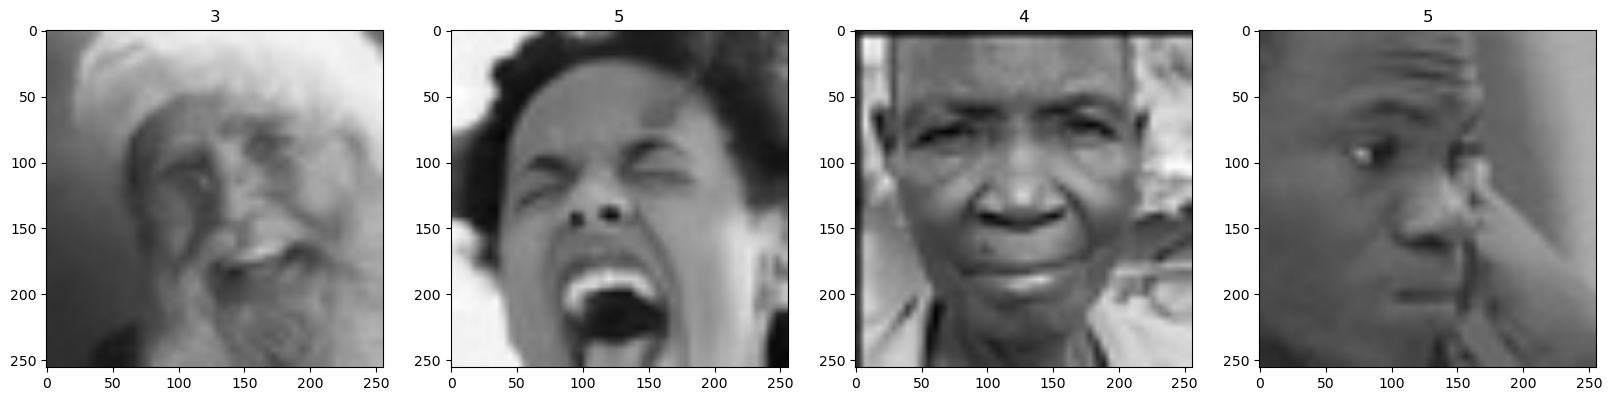

In [169]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [276]:
devices = tf.config.list_physical_devices()
print("\nDevices: ", devices)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  details = tf.config.experimental.get_device_details(gpus[0])
  print("GPU details: ", details)


Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU details:  {'device_name': 'METAL'}


In [171]:
scaled = batch[0] / 255

In [172]:
scaled.max()

1.0

In [173]:
data = data.map(lambda x,y: (x/255, y))

In [174]:
scaled_iterator = data.as_numpy_iterator()

In [175]:
batch = scaled_iterator.next()


In [176]:
batch[0].max()

1.0

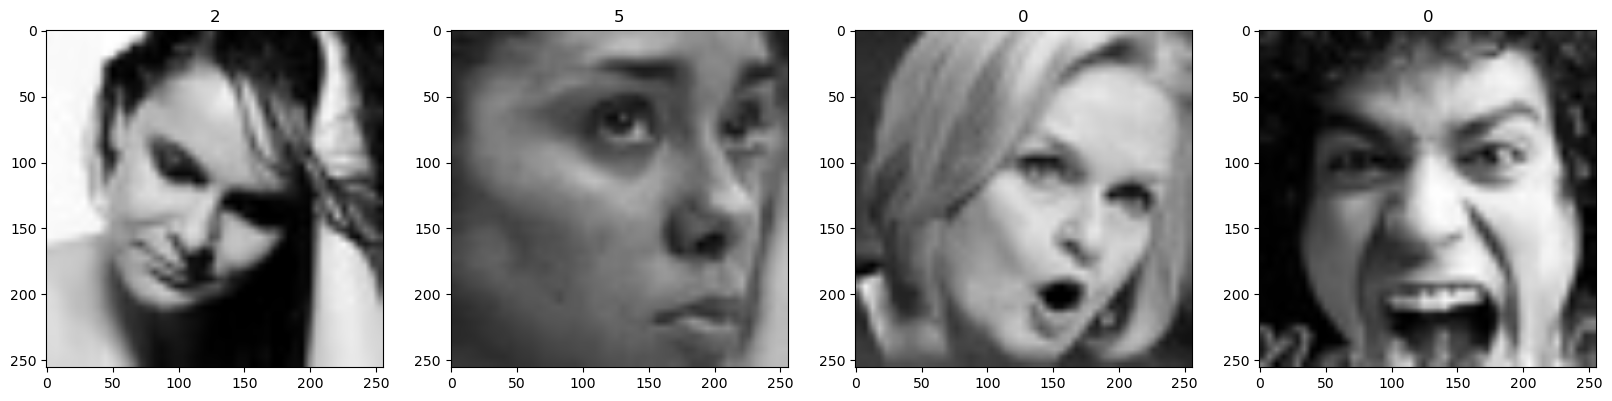

In [177]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [178]:
len(data)

898

In [179]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [38]:
test_size

89

In [180]:

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

deep learning start

In [199]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU


In [200]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

In [201]:
regularization = l2(0.01)

In [202]:
model = Sequential()

In [203]:
batch[1][5]

2

In [204]:
model.add(Conv2D(16, (3,3), 1, activation=LeakyReLU(alpha=0.1), input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation=LeakyReLU(alpha=0.1), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation=LeakyReLU(alpha=0.1), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation=LeakyReLU(alpha=0.1)))
model.add(Dropout(0.9))
model.add(Dense(7, activation='softmax'))

In [205]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [206]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 30, 30, 16)     

In [207]:
logdir='./logs'

In [208]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [209]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [212]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback, early_stopping])

Epoch 1/20
628/628 [==============================] - 49s 78ms/step - loss: 1.9163 - accuracy: 0.2547 - val_loss: 1.8044 - val_accuracy: 0.2723
Epoch 2/20
628/628 [==============================] - 49s 78ms/step - loss: 1.7536 - accuracy: 0.3126 - val_loss: 1.6724 - val_accuracy: 0.3605
Epoch 3/20
628/628 [==============================] - 51s 82ms/step - loss: 1.6568 - accuracy: 0.3601 - val_loss: 1.6118 - val_accuracy: 0.3904
Epoch 4/20
628/628 [==============================] - 50s 79ms/step - loss: 1.5929 - accuracy: 0.3912 - val_loss: 1.5564 - val_accuracy: 0.4181
Epoch 5/20
628/628 [==============================] - 50s 80ms/step - loss: 1.5389 - accuracy: 0.4186 - val_loss: 1.5127 - val_accuracy: 0.4396
Epoch 6/20
628/628 [==============================] - 53s 84ms/step - loss: 1.4953 - accuracy: 0.4347 - val_loss: 1.5038 - val_accuracy: 0.4424
Epoch 7/20
628/628 [==============================] - 68s 107ms/step - loss: 1.4558 - accuracy: 0.4542 - val_loss: 1.4860 - val_accuracy

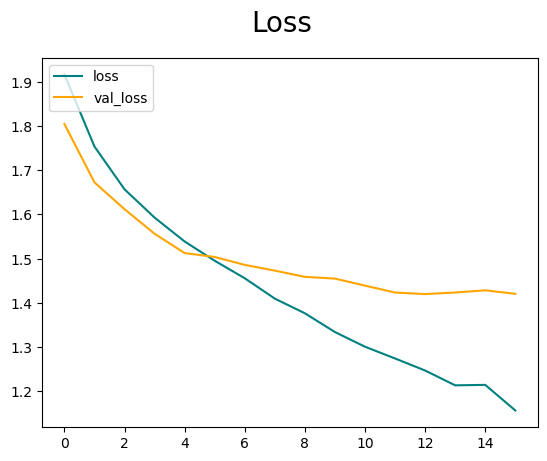

In [213]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

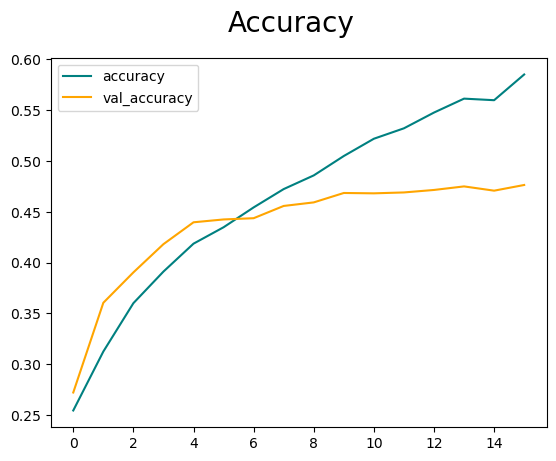

In [214]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [215]:
test_loss, test_accuracy = model.evaluate(test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

89/89 [==============================] - 5s 27ms/step - loss: 1.4479 - accuracy: 0.4603
Test Loss: 1.4479131698608398
Test Accuracy: 0.4603230357170105


testing the images


In [43]:
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image as keras_image
import matplotlib.pyplot as plt

In [380]:
img_path = '/Users/seemanthrajukurapati/Documents/ml projects/music_recommendation/archive (1)/test/happy/PrivateTest_95094.jpg'  
img = Image.open(img_path)

In [381]:
img = img.convert('RGB')

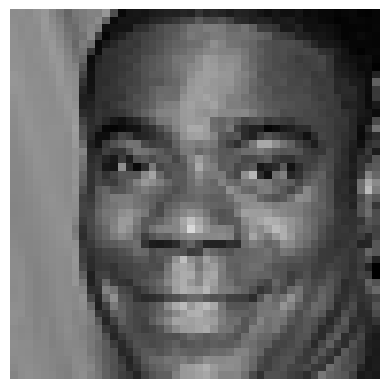

In [382]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [383]:
img = img.resize((256, 256))  # Resize the image to match the input shape of the model
img_array = keras_image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  

In [384]:
predictions = model.predict(img_array)

1/1 [==============================] - 0s 65ms/step


In [385]:
predicted_class_index = np.argmax(predictions[0])
print("Predicted class index:", predicted_class_index)

Predicted class index: 3


In [386]:
model.save('last_model.h5')

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [18]:
model = load_model('/Users/seemanthrajukurapati/Documents/ml projects/music_recommendation/emotion_detection_model.h5')

In [63]:
img_path = '/Users/seemanthrajukurapati/Documents/ml projects/music_recommendation/archive (1)/test/surprise/PrivateTest_1388103.jpg' 
img = Image.open(img_path)

In [64]:
img = img.convert('RGB')

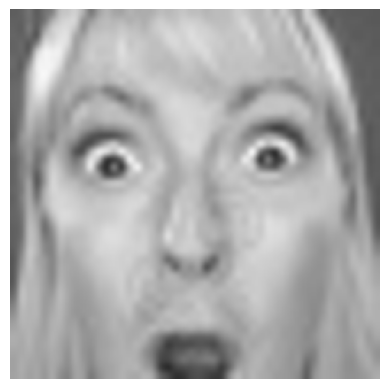

In [69]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [65]:
img = img.resize((256, 256))  # Resize the image to match the input shape of the model
img_array = keras_image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0 

In [66]:
predictions = model.predict(img_array)

1/1 [==============================] - 0s 20ms/step


In [67]:
predicted_class_index = np.argmax(predictions[0])
print("Predicted class index:", predicted_class_index)

Predicted class index: 6


In [72]:

emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral',  'sad', 'surprise']

class_index_to_name = {i: class_name for i, class_name in enumerate(class_names)}

predicted_class_name = class_index_to_name[predicted_class_index]

print("Predicted class:", predicted_class_name)


Predicted class: surprise


vedio recognition

In [70]:
import cv2
from tensorflow.keras.models import load_model
import numpy as np

In [71]:
model = load_model('emotion_detection_model.h5')

saving

In [217]:
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.regularizers import l2

In [218]:
# Save the model and training history
model.save('model.h5')

# Save training history
import pickle
with open('history.pickle', 'wb') as f:
    pickle.dump(history.history, f)

In [219]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle

# Load the model
model = load_model('model.h5')

# Load the training history
with open('history.pickle', 'rb') as f:
    history = pickle.load(f)

training on new data

In [220]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

converting to rgb from greyscale

In [234]:
import os
import cv2
import numpy as np

In [235]:
grayscale_train_dir = "/Users/seemanthrajukurapati/Documents/ml projects/music_recommendation/archive/train"
grayscale_test_dir = "/Users/seemanthrajukurapati/Documents/ml projects/music_recommendation/archive/test"
rgb_train_dir = "/Users/seemanthrajukurapati/Documents/ml projects/music_recommendation/archive/rgb_train"
rgb_test_dir = "/Users/seemanthrajukurapati/Documents/ml projects/music_recommendation/archive/rgb_test"


In [247]:
from PIL import Image
import os

In [252]:
def grayscale_to_rgb(grayscale_image):
    return cv2.cvtColor(grayscale_image, cv2.COLOR_GRAY2RGB)

In [253]:
def process_images_in_directory(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if the file is an image
            if file.endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(root, file)
                # Load the image in grayscale
                grayscale_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if grayscale_image is not None:
                    # Convert grayscale to RGB
                    rgb_image = grayscale_to_rgb(grayscale_image)
                    # Save the RGB image
                    cv2.imwrite(file_path, rgb_image)
                    print(f"Converted {file} to RGB.")
                else:
                    print(f"Error reading {file}. Skipping...")
            else:
                print(f"Skipping non-image file: {file}")

In [254]:
test_directory = "/Users/seemanthrajukurapati/Documents/ml projects/music_recommendation/archive/test"
train_directory = "/Users/seemanthrajukurapati/Documents/ml projects/music_recommendation/archive/train"


In [ ]:
print("Processing images in the test directory...")
process_images_in_directory(test_directory)

In [ ]:
print("Processing images in the train directory...")
process_images_in_directory(train_directory)

In [264]:
train_data_dir = "/Users/seemanthrajukurapati/Documents/ml projects/music_recommendation/archive/train"
test_data_dir = "/Users/seemanthrajukurapati/Documents/ml projects/music_recommendation/archive/test"


In [265]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [266]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

In [271]:
train_datagen = ImageDataGenerator(rescale=1./255)  # Other preprocessing options can be added here
test_datagen = ImageDataGenerator(rescale=1./255)

In [272]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    color_mode='rgb',  # Load images as RGB
    class_mode='categorical'  # For multi-class classification
)

Found 28709 images belonging to 7 classes.


In [273]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    color_mode='rgb',  # Load images as RGB
    class_mode='categorical',
    shuffle=False  # No need to shuffle test data
)

Found 7178 images belonging to 7 classes.


In [274]:
model = load_model('model.h5')

# Compile the model for fine-tuning
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



In [277]:

# Fine-tune the model on new data
history_fine_tune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.n // batch_size
)

Epoch 1/10
181/897 [=====>........................] - ETA: 47s - loss: 1.3043 - accuracy: 0.5254

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x5x1x256xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x5x1x256xi1>'


897/897 [==============================] - 66s 73ms/step - loss: 1.3199 - accuracy: 0.5167 - val_loss: 1.4062 - val_accuracy: 0.4798
Epoch 2/10
897/897 [==============================] - 64s 72ms/step - loss: 1.2916 - accuracy: 0.5285 - val_loss: 1.4183 - val_accuracy: 0.4725
Epoch 3/10
897/897 [==============================] - 66s 73ms/step - loss: 1.2619 - accuracy: 0.5388 - val_loss: 1.3866 - val_accuracy: 0.4835
Epoch 4/10
897/897 [==============================] - 64s 71ms/step - loss: 1.2326 - accuracy: 0.5521 - val_loss: 1.3762 - val_accuracy: 0.4905
Epoch 5/10
897/897 [==============================] - 64s 71ms/step - loss: 1.1989 - accuracy: 0.5596 - val_loss: 1.3867 - val_accuracy: 0.4897
Epoch 6/10
897/897 [==============================] - 63s 71ms/step - loss: 1.1766 - accuracy: 0.5760 - val_loss: 1.3571 - val_accuracy: 0.5004
Epoch 7/10
897/897 [==============================] - 64s 71ms/step - loss: 1.1499 - accuracy: 0.5872 - val_loss: 1.3858 - val_accuracy: 0.4904
Epo

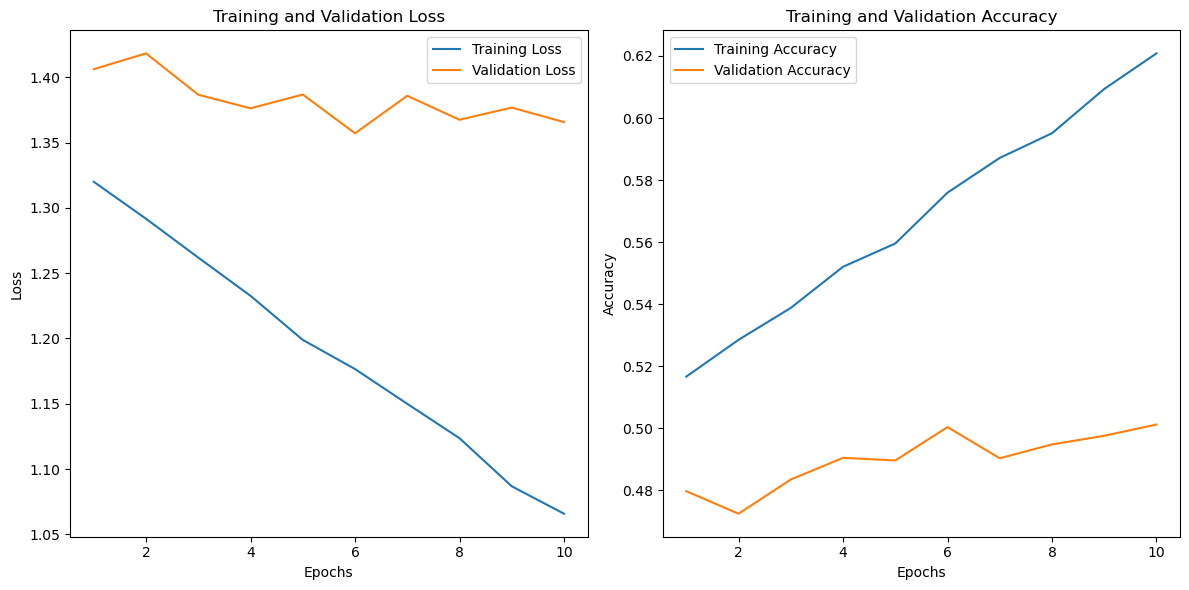

In [279]:
import matplotlib.pyplot as plt

# Get training and validation loss from the history object
train_loss = history_fine_tune.history['loss']
val_loss = history_fine_tune.history['val_loss']

# Get training and validation accuracy from the history object
train_acc = history_fine_tune.history['accuracy']
val_acc = history_fine_tune.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [280]:
test_loss, test_accuracy = model.evaluate(test_generator)

# Print test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

225/225 [==============================] - 6s 27ms/step - loss: 1.3666 - accuracy: 0.5010
Test Loss: 1.366573691368103
Test Accuracy: 0.5009751915931702


In [288]:
import numpy as np

# Convert NumPy arrays to Python lists in optimizer_state
optimizer_state_serializable = [arr.tolist() for arr in optimizer_state]

# Save the optimizer's state
with open("optimizer_state.json", "w") as json_file:
    json.dump(optimizer_state_serializable, json_file)

In [286]:
optimizer_state = model.optimizer.get_weights()
optimizer_state_serializable = [arr.tolist() for arr in optimizer_state]
with open("optimizer_state.json", "w") as json_file:
    json.dump(optimizer_state_serializable, json_file)

# Save the training history
with open("training_history.json", "w") as json_file:
    json.dump(history_fine_tune.history, json_file)


In [300]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("/Users/seemanthrajukurapati/Documents/ml projects/music_recommendation/emotion_detection_model.h5")

In [301]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image from file
img_path = "/Users/seemanthrajukurapati/Documents/ml projects/music_recommendation/archive (1)/test/happy/PrivateTest_556985.jpg"  # Replace this with the path to your image
img = image.load_img(img_path, target_size=(256, 256))  # Adjust the target size as needed

# Convert the image to a numpy array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Preprocess the image (if needed)
# Example:
# img_array /= 255.0


# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Map class index to class name
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral',  'sad', 'surprise']
class_index_to_name = {i: class_name for i, class_name in enumerate(emotions)}

# Get the predicted class name
predicted_class_name = class_index_to_name[predicted_class_index]

print("Predicted class:", predicted_class_name)


1/1 [==============================] - 0s 108ms/step
Predicted class: happy


In [2]:
import pandas as pd

In [304]:
Music_Player = pd.read_csv("/Users/seemanthrajukurapati/Documents/ml projects/music_recommendation/data_moods.csv")
Music_Player = Music_Player[['name','artist','mood','popularity']]
Music_Player.head()

,name,artist,mood,popularity
0,1999,Prince,Happy,68
1,23,Blonde Redhead,Sad,43
2,9 Crimes,Damien Rice,Sad,60
3,99 Luftballons,Nena,Happy,2
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic,60


In [305]:
Music_Player["mood"].value_counts()

mood
Sad          197
Calm         195
Energetic    154
Happy        140
Name: count, dtype: int64

In [306]:
Music_Player["popularity"].value_counts()

popularity
0     92
51    23
52    22
50    21
55    21
      ..
80     1
2      1
14     1
15     1
88     1
Name: count, Length: 83, dtype: int64

In [307]:
Play = Music_Player[Music_Player['mood'] =='Calm' ]
Play = Play.sort_values(by="popularity", ascending=False)
Play = Play[:5].reset_index(drop=True)
display(Play)

,name,artist,mood,popularity
0,Lost,Annelie,Calm,64
1,Curiosity,Beau Projet,Calm,60
2,Escaping Time,Benjamin Martins,Calm,60
3,Just Look at You,369,Calm,59
4,Vague,Amaranth Cove,Calm,59


In [308]:
def Recommend_Songs(pred_class):
    
    if( pred_class=='Disgust' ):

        Play = Music_Player[Music_Player['mood'] =='Sad' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        print(Play)

    if( pred_class=='Happy' or pred_class=='Sad' ):

        Play = Music_Player[Music_Player['mood'] =='Happy' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        print(Play)

    if( pred_class=='Fear' or pred_class=='Angry' ):

        Play = Music_Player[Music_Player['mood'] =='Calm' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        print(Play)

    if( pred_class=='Surprise' or pred_class=='Neutral' ):

        Play = Music_Player[Music_Player['mood'] =='Energetic' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        print(Play)


In [3]:
csv_file_path = '/Users/seemanthrajukurapati/Documents/ml projects/music_recommendation/data_moods.csv'
music_data = pd.read_csv(csv_file_path)

# Get all column names
column_names = music_data.columns

# Print all column names
print("Column Names:")
for column_name in column_names:
    print(column_name)

Column Names:
name
album
artist
id
release_date
popularity
length
danceability
acousticness
energy
instrumentalness
liveness
valence
loudness
speechiness
tempo
key
time_signature
mood


In [5]:
import pandas as pd

def print_unique_values(column_name):
    data = pd.read_csv(csv_file_path)
    unique_values = data[column_name].unique()
    for value in unique_values:
        print(value)

print_unique_values("mood")

Happy
Sad
Energetic
Calm
